## Préparation et Traitement des données

Dans cette partie, nous allons préparer et traiter les données pour ensuite les visualiser et les utiliser pour construire nos modèles de Machine Learning.

In [6]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline

In [7]:
# lecture d'un fichier xcel
df = pd.read_excel('/home/cesar/Dos_IA/Projet_maladie_E_C_T_C/8e49d734-bd63-432d-814e-6c4599f33f04.xlsx')

print (df.head())

   AGE   SEXE  TDT  PAR  CHOLESTEROL  GAJ     ECG  FCMAX ANGINE  DEPRESSION   \
0   40  homme   AA  140          289    0  Normal    172    Non          0.0   
1   49  femme  DNA  160          180    0  Normal    156    Non          1.0   
2   37  homme   AA  130          283    0      ST     98    Non          0.0   
3   48  femme  ASY  138          214    0  Normal    108    Oui          1.5   
4   54  homme  DNA  150          195    0  Normal    122    Non          0.0   

       PENTE  CŒUR  
0  Ascendant     0  
1       Plat     1  
2  Ascendant     0  
3       Plat     1  
4  Ascendant     0  


In [4]:
df1= df.copy()

df1.loc[:,'TDT'].replace(['ASY', 'DNA','AA', 'AT'], [0, 1, 2, 3], inplace=True)
df1.loc[:,'ECG'].replace(['Normal', 'LVH','ST'], [0, 1, 2], inplace=True)
df1.loc[:,'ANGINE'].replace(['Non', 'Oui'], [0, 1], inplace=True)
df1.loc[:,'PENTE'].replace(['Plat', 'Ascendant','Descendant'], [0, 1, 2], inplace=True)
df1.loc[:,'SEXE'].replace(['homme', 'femme'], [0, 1], inplace=True)

print (df1.head())

   AGE  SEXE  TDT  PAR  CHOLESTEROL  GAJ  ECG  FCMAX  ANGINE  DEPRESSION   \
0   40     0    2  140          289    0    0    172       0          0.0   
1   49     1    1  160          180    0    0    156       0          1.0   
2   37     0    2  130          283    0    2     98       0          0.0   
3   48     1    0  138          214    0    0    108       1          1.5   
4   54     0    1  150          195    0    0    122       0          0.0   

   PENTE  CŒUR  
0      1     0  
1      0     1  
2      1     0  
3      0     1  
4      1     0  


In [8]:
df1.describe().round(2)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,0.21,0.75,132.40,198.80,0.23,0.59,136.81,0.40,0.89,0.57,0.55
std,9.43,0.41,0.93,18.51,109.38,0.42,0.79,25.46,0.49,1.07,0.62,0.50
min,28.00,0.00,0.00,0.00,0.00,0.00,0.00,60.00,0.00,-2.60,0.00,0.00
25%,47.00,0.00,0.00,120.00,173.25,0.00,0.00,120.00,0.00,0.00,0.00,0.00
50%,54.00,0.00,0.00,130.00,223.00,0.00,0.00,138.00,0.00,0.60,0.00,1.00
75%,60.00,0.00,1.00,140.00,267.00,0.00,1.00,156.00,1.00,1.50,1.00,1.00
max,77.00,1.00,3.00,200.00,603.00,1.00,2.00,202.00,1.00,6.20,2.00,1.00


Nous n’avons pas de valeurs manquantes dans nos données et pour égaliser les valeurs des différents attributs, nous appliquons la mise à l’échelle Min-Max :

In [9]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range =(0,100))
# fixer l'échelle de la valeur maximale et minimale de sbp dans une fourchette de 0 à 100, normaliser
df1['PAR'] = scale.fit_transform(df1['PAR'].values.reshape(-1,1))
df1['CHOLESTEROL'] = scale.fit_transform(df1['CHOLESTEROL'].values.reshape(-1,1))
df1['FCMAX'] = scale.fit_transform(df1['FCMAX'].values.reshape(-1,1))

Et les données sont maintenant les suivantes :

In [10]:
df1.describe().round(2)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,0.21,0.75,66.20,32.97,0.23,0.59,54.09,0.40,0.89,0.57,0.55
std,9.43,0.41,0.93,9.26,18.14,0.42,0.79,17.93,0.49,1.07,0.62,0.50
min,28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2.60,0.00,0.00
25%,47.00,0.00,0.00,60.00,28.73,0.00,0.00,42.25,0.00,0.00,0.00,0.00
50%,54.00,0.00,0.00,65.00,36.98,0.00,0.00,54.93,0.00,0.60,0.00,1.00
75%,60.00,0.00,1.00,70.00,44.28,0.00,1.00,67.61,1.00,1.50,1.00,1.00
max,77.00,1.00,3.00,100.00,100.00,1.00,2.00,100.00,1.00,6.20,2.00,1.00


<AxesSubplot:>

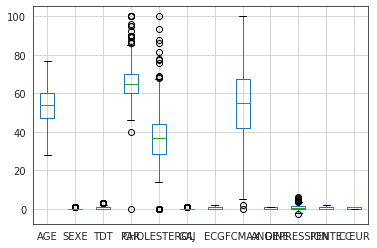

In [11]:
df1.boxplot()

## Visualisation des données

Après avoir comparé différents attributs entre eux, nous obtenons les résultats utiles suivants.

Valeur numérique mesurée en dépression

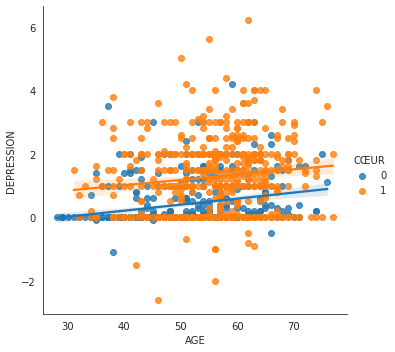

In [13]:
from seaborn import lmplot
lmplot(x="AGE", y="DEPRESSION ", hue="CŒUR", data=df1)

Cholestérol sérique [mm/dl]

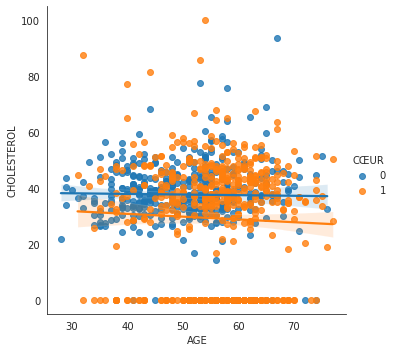

In [15]:
lmplot(x="AGE", y="CHOLESTEROL", hue="CŒUR", data=df1)

Fréquence cardiaque maximale atteinte 

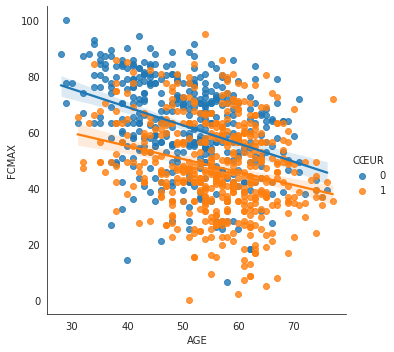

In [16]:
lmplot(x="AGE", y="FCMAX", hue="CŒUR", data=df1)

Type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]

TDT(0) = ASY


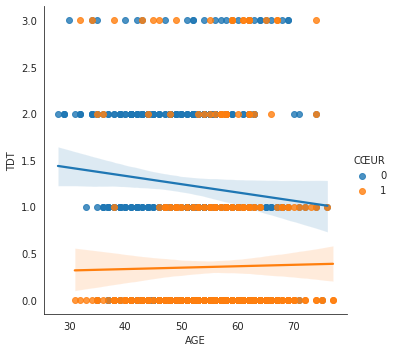

In [17]:
lmplot(x="AGE", y="TDT", hue="CŒUR", data=df1)

Angine induite par l'exercice [Oui, Non]

ANGINE(1) = Oui


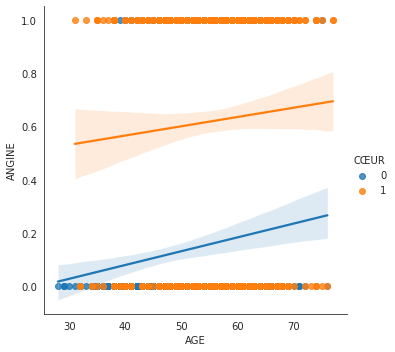

In [18]:
lmplot(x="AGE", y="ANGINE", hue="CŒUR", data=df1)

La pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]

PENTE(0) = Plat


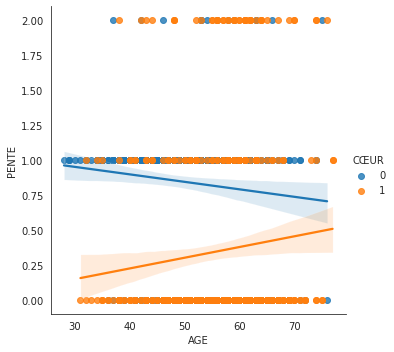

In [19]:
lmplot(x="AGE", y="PENTE", hue="CŒUR", data=df1)

## Prétraitement
Cette partie est essentielle à notre problème et compte tenu du type de données que nous avons.
Lebelencoder: Nous devons coder des étiquettes cible avec une valeur comprise entre 0 et n_classes-1. 

In [25]:
from sklearn.preprocessing import LabelEncoder
X = df1[['AGE', 'SEXE', 'TDT', 'PAR', 'CHOLESTEROL', 'GAJ', 'ECG', 'FCMAX', 'ANGINE', 'DEPRESSION ', 'PENTE']]
y = df1['CŒUR']#.values
label_encod = LabelEncoder()
y = label_encod.fit_transform(y)
#y = LabelEncoder().fit_transform(y) # => identique
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

## Construire un modèle

Nous allons construire un modèle de classificateur.
Mais avant, diviser les données entières en deux sous-données: train et test. 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("La longueur du dataset initial :", len(X))
print("La longueur du dataset d'entraînement :", len(X_train))
print("La longueur du dataset de test :", len(X_test))

La longueur du dataset initial : 918
La longueur du dataset d'entraînement : 688
La longueur du dataset de test : 230


In [28]:
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

## Modèle 1 : Support Vector Machine (SVM)

Un Support Vector Machine (SVM) est un classificateur discriminatoire formellement défini par un hyperplan de séparation. En d’autres termes, à partir de données d’entraînement étiquetées (apprentissage supervisé), l’algorithme produit un hyperplan optimal qui catégorise les nouveaux exemples.

In [38]:
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')

In [39]:
svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [40]:
y_pred_svm =svm_clf.predict(X_test)

In [41]:
y_pred_svm

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [42]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[ 88,  10],
       [ 24, 108]])

In [43]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.8521739130434782


Exactitude (accuracy) obtenue pour le modèle SVM ~85%

## Modèle 2 : k Nearest Neighbors (kNN)

En reconnaissance de formes, l’algorithme des k-plus proches voisins (k-NN) est une méthode non paramétrique utilisée pour la classification et la régression. Dans les deux cas, l’entrée consiste en k exemples d’entraînement les plus proches dans l’espace des caractéristiques.
Dans la classification k-NN, la sortie est une appartenance à une classe.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors =5,n_jobs = -1,leaf_size = 60,algorithm='brute')

In [46]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, n_jobs=-1)

In [47]:
KNeighborsClassifier(algorithm='brute', leaf_size=60, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=60, n_jobs=-1)

In [48]:
y_pred_knn = knn_clf.predict(X_test)
y_pred_knn

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [49]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[69, 29],
       [35, 97]])

In [50]:
knn_result = accuracy_score(y_test,y_pred_knn)
knn_result

0.7217391304347827

Exactitude obtenue pour le KNN ~72%